<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 8

# Question 1

In this question, we will use neural network to fit a linear regression problem. Given 100 data x, and y where
$$y= ax+b+e$$
Here, $e$ is the noise. Then we want to find the value of the coefficient $a$ and $b$. The data $x$ is between 0 and 1.The coefficient $a$ and $b$ are between -10 and 10. There are in total 500 data.

First, we have the following data

In [1]:
!pip install latexify-py


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


\mathrm{noisy\_linear}(a, b, x) = a x + b + \mathrm{np}.\mathrm{random}.\mathrm{rand} \mathopen{}\left( 100 \mathclose{}\right).\mathrm{astype} \mathopen{}\left( \textrm{"float32"} \mathclose{}\right) \cdot 0.3
<class 'latexify.ipython_wrappers.LatexifiedFunction'>
[425, 47, 180, 172, 381, 200, 6, 272, 178, 106]


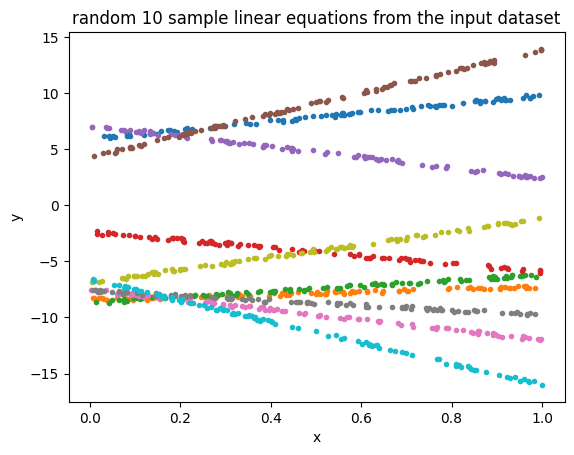

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

from IPython.display import display, Math

import latexify

np.random.seed(1234)

# The coefficient a and b area between -10 and 10. 
# set 500 different combinations of a and b.
a,b = np.random.rand(500).astype('float32')*20.0-10.0, np.random.rand(500).astype('float32')*20.0-10.0

data_input = np.empty((500,200))
np.random.seed(None)


"""
Original problem:

Input data: 
Given a set of data points (x_i, y_i), i=1,...,n, 

The size of the set is, m = 500 (bigger than n to make it over-determined), 
n = 200 (100 points for x and 100 points for y. Totally 100 points in the figure)

Output data: 
Use neural network to predict the best linear model y = ax + b + e
where e is the noise.
"""
@latexify.function
def noisy_linear(a,b,x):
    return a*x + b + np.random.rand(100).astype('float32')*0.3

print(noisy_linear)
print(type(noisy_linear))

# 1. Create the set of data points (x_i, y_i), i=1,...,n, 
# For each combination of a and b, generate 100 points of x and y
for i,value_a, value_b in zip(range(500),a,b):
    x= np.random.rand(100).astype('float32')
    # define y = ax + b + noise (e)
    y= noisy_linear(value_a, value_b,x)
    data_input[i]= np.hstack((x.reshape(1,100), y.reshape(1,100)))

# To store all the output values (y) for each input values (x) in a single matrix, 
# the code reshaping `a` and `b` as column vector and then horizontally stacks them together
data_output = np.hstack((a.reshape(500,1), b.reshape(500,1)))

X_train, X_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33)

#sampling 2 random samples from the dataset: 
total_columns = data_input.shape[0]
# generate 3 column numbers between 0 and total_columns

num_of_samples = 10 

random_numbers = []
for _ in range(num_of_samples):
    random_number = random.randint(0, 499)
    random_numbers.append(random_number)

print(random_numbers)

for i in range(len(random_numbers)):
    row_of_record = random_numbers[i]
    plt.scatter(data_input[row_of_record,:100],data_input[row_of_record,100:],marker='.')
plt.title(f'random {len(random_numbers)} sample linear equations from the input dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Mathematical equation involved: 

In [3]:
noisy_linear

Input and output dataset:

![image (3) - Copy.png](<attachment:image (3) - Copy.png>)



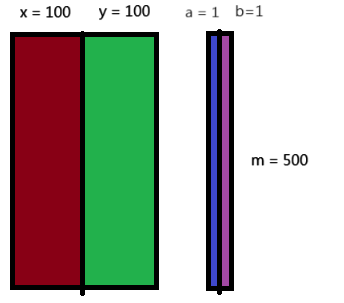

## Q1a

Make a neural network model using the $(x,y)$ input data to predict the coefficient data $a,b$ such that the MSE value is less than $22$. 

Notice that each training input should be a 1D array of size $200$.

Train with `validation_split=0.1`, epochs within $200$ and `batch_size = 32`.

You can use at most $2$ layers (excluding the output layer) with less than $100$ units on each layer.


In [4]:
print(data_input.shape, data_output.shape) 

# Here, we have 500 samples, 
# each sample has 200 features (100 for x and 100 for y)

(500, 200) (500, 2)


In [5]:
## answer 1a
from keras.optimizers import SGD  # Import SGD optimizer from the keras.optimizers module
from keras.models import Sequential
from keras.layers import Dense


from sklearn.model_selection import train_test_split

unit = 10 # this value should be the number of neurons in the layer
input_shape = 200 # this value should be the number of features in your dataset

# define the model
model = Sequential()
# input layer 
model.add(Dense(units=100, activation='relu', kernel_initializer='he_normal', input_shape=(data_input.shape[1],))) # data_input.shape[1] = 200
# hidden layer
model.add(Dense(units=16, activation='relu', kernel_initializer='he_normal',))
# hidden layer
model.add(Dense(units=data_output.shape[1])) #　data_output.shape[1] =  2 

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 16)                1616      
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 21750 (84.96 KB)
Trainable params: 21750 (84.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [6]:
from keras.callbacks import History  # Import History callback

# compile the model(defining loss function for the NN)
# opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy']) #mse: mean squared error

# Preprocess the data (optional)
X_train, X_test, y_train, y_test = train_test_split(data_input, 
                                                    data_output, 
                                                    test_size=0.2)

# Create a History callback to record loss values
history = History()

# train the model
model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          validation_split=0.1,
          epochs=200, 
          batch_size=32,
          callbacks=[history],)

Epoch 1/200
13/13 [==============================] - 1s 12ms/step - loss: 25.5638 - accuracy: 0.6275 - val_loss: 21.4019 - val_accuracy: 0.6000
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 19.0531 - accuracy: 0.6750 - val_loss: 20.9257 - val_accuracy: 0.5900
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 17.4074 - accuracy: 0.6950 - val_loss: 20.6424 - val_accuracy: 0.6000
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 16.7636 - accuracy: 0.7125 - val_loss: 20.0498 - val_accuracy: 0.6000
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 15.9383 - accuracy: 0.7200 - val_loss: 20.1656 - val_accuracy: 0.6100
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 15.3409 - accuracy: 0.7275 - val_loss: 20.9769 - val_accuracy: 0.6000
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 14.5244 - accuracy: 0.7350 - val_loss: 19.4516 - val_accuracy: 0.630

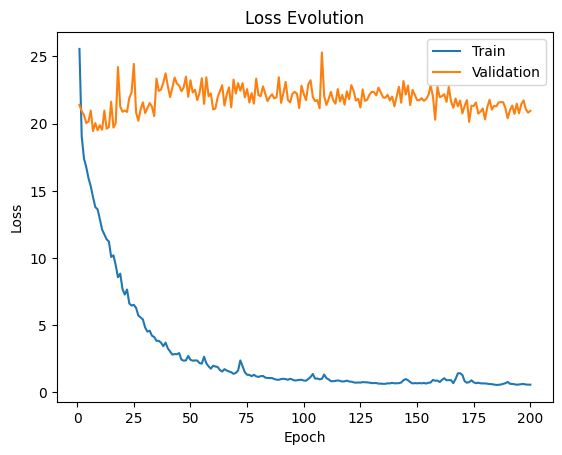

In [7]:
# evaluate the model (optional)
# Get the recorded loss values from history
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()

Loss in the last loop (within training set data):

In [8]:
loss_values[-1]

0.575404703617096

Evaluate the neural network with test set data:

In [9]:
loss = model.evaluate(X_test, y_test)
print(loss)

4/4 [==============================] - 0s 2ms/step - loss: 20.9558 - accuracy: 0.6400
[20.955787658691406, 0.6399999856948853]


In [10]:
yhat = model.predict(X_test)
print(yhat.shape)
print(yhat)

4/4 [==============================] - 0s 1ms/step
(100, 2)
[[ 2.89553404e-01  2.27968621e+00]
 [-3.95267487e-01  5.54271507e+00]
 [-2.45820594e+00  8.41919899e+00]
 [-5.49267721e+00  1.20295036e+00]
 [-4.58321476e+00  8.93512249e+00]
 [-1.48949289e+01  1.23718815e+01]
 [-3.46334100e-01 -3.95742011e+00]
 [-3.14270520e+00 -1.02859840e+01]
 [ 1.29399586e+00 -5.68107796e+00]
 [ 2.56273699e+00 -5.63054085e+00]
 [ 6.57044458e+00 -8.76820755e+00]
 [ 3.21659589e+00 -5.53429604e-01]
 [-1.37696311e-01 -1.79278165e-01]
 [-1.70755935e+00 -9.26006854e-01]
 [-2.80381727e+00 -1.11005363e+01]
 [ 1.45726979e+00 -1.35029244e+00]
 [ 3.40358305e+00  7.41003180e+00]
 [-7.32994318e-01  2.49622512e+00]
 [-7.66872242e-03  7.13738251e+00]
 [ 2.30179802e-01 -8.82022190e+00]
 [ 4.39256001e+00  8.59141922e+00]
 [ 7.03845769e-02 -1.49414873e+00]
 [-3.34283137e+00  5.45774889e+00]
 [-4.32884407e+00 -6.82748556e+00]
 [-1.02924633e+00  3.42901158e+00]
 [-1.63373280e+00 -7.96154320e-01]
 [ 8.11227977e-01 -1.72674608e

## Q1b

Given the following $(x,y)$ data, plot the best fit line predicted by your model along with the given data.

1/1 [==============================] - 0s 13ms/step


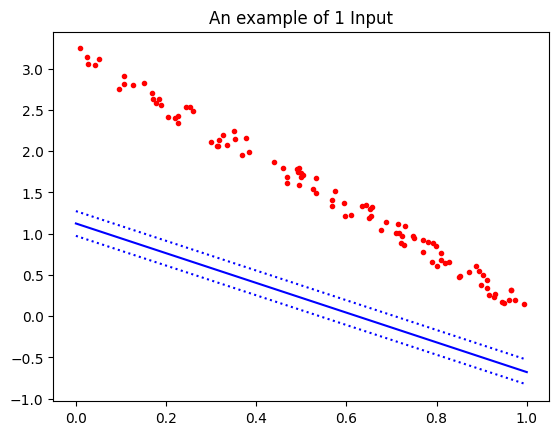

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed
np.random.seed(12345)

# Initialize independent input linear equation (x_i, y_i)
x = np.random.rand(100).astype('float32')
y = -3 * x + 3 + np.random.rand(100).astype('float32') * 0.3

# Set input data to be (1,200) to fit the input layer of the neural network
x_test = np.hstack((x.reshape(1, 100), y.reshape(1, 100)))

# Put the test data into the model to predict the output
yhat = model.predict(x_test)

# Best fit line assuming e = 0. Construct the best fit line with y = Ax + b
# Set up x value range
x_bfl = np.linspace(0, 1, 100)

# Calculate corresponding y value range for the best fit line: y = Ax + b
y_bfl = x_bfl * yhat[0][0] + yhat[0][1]

# Calculate the parallel lines by adding/subtracting the random noise term
y_parallel_plus = y_bfl + 0.3/2
y_parallel_minus = y_bfl -  0.3/2

# Plot the test dataset
plt.scatter(x, y, marker='.', color='red')

# Plot the best fit line as a straight line
plt.plot(x_bfl, y_bfl, color='blue')

# Plot the parallel lines as dotted lines
plt.plot(x_bfl, y_parallel_plus, linestyle='dotted', color='blue')
plt.plot(x_bfl, y_parallel_minus, linestyle='dotted', color='blue')

plt.title('An example of 1 Input')
plt.show()

# Question 2

In this question, you need to use a neural network to make a classification of the below data.

In [12]:
from numpy import argmax
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn import datasets
import matplotlib.pyplot as plt

np.random.seed(1234)
iris = datasets.load_iris()
X = iris.data
y = iris.target

## Q2a

Split the data into training and testing sets at a ratio of $8:2$.


Consider three models:

- `model_A`: 1 dense layer (`relu`) with 3 units, followed by 1 dense layer (`softmax`)
- `model_B`: 1 dense layer (`relu`) with 10 units, followed by 1 dense layer (`softmax`)
- `model_C`: 2 dense layers (`relu`) with 10 units and then 8 units, followed by 1 dense layer (`softmax`)

We fix the model configurations:
`epoch = 150`,  `batch_size=10`, `loss="sparse_categorical_corssentropy"` and `metrics = ['accuracy']`.

Use the `adam` optimizer and batch normalization.

Train each model using the training set $10$ times. Which model gives the highest average test accuracy?

In [13]:
## answer 2a

# Preprocess the data (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


Obtain unique labels from dataset without hardcoding: 

In [14]:
print(np.unique(y))
print(len(np.unique(y)))

[0 1 2]
3


In [15]:
from keras.models import Sequential
from keras.layers import Dense


input_shape = X_train.shape[1]
output_shape = len(np.unique(y))

# define the model_A
model_A = Sequential()
model_A.add(Dense(units=3, activation='relu', input_shape=(input_shape,)))
model_A.add(Dense(units=output_shape, activation='softmax'))

# define the model_B
model_B = Sequential()
model_B.add(Dense(units=10, activation='relu', input_shape=(input_shape,)))
model_B.add(Dense(units=output_shape, activation='softmax'))

# define the model_C
model_C = Sequential()
model_C.add(Dense(units=10, activation='relu', input_shape=(input_shape,)))
model_C.add(Dense(units=8, activation='relu'))
model_C.add(Dense(units=output_shape, activation='softmax'))


In [16]:
# write a function that pass a series of command that defines compile, train, fit, evaluate for any models

"""

def test_accuracy_of_model(model):
    model.compile(optimizer='adam',
                  loss="sparse_categorical_crossentropy",
                  metrics = ['accuracy'])
    # fit the model 10 times and take the average of the accuracy
    accuaracy = 0
    num_of_run = 0
    for _ in range(10):
        model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)
        loss, acc = model.evaluate(X_test, y_test, verbose=0)
        accuaracy += acc
        num_of_run += 1
    acc = accuaracy/num_of_run
    print(f'Test for {model}:')
    print(f'Total number of runs: {num_of_run}')
    print('Average test Accuracy: %.3f' % acc)

test_accuracy_of_model(model_A)
test_accuracy_of_model(model_B)
test_accuracy_of_model(model_C)

"""
        

'\n\ndef test_accuracy_of_model(model):\n    model.compile(optimizer=\'adam\',\n                  loss="sparse_categorical_crossentropy",\n                  metrics = [\'accuracy\'])\n    # fit the model 10 times and take the average of the accuracy\n    accuaracy = 0\n    num_of_run = 0\n    for _ in range(10):\n        model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)\n        loss, acc = model.evaluate(X_test, y_test, verbose=0)\n        accuaracy += acc\n        num_of_run += 1\n    acc = accuaracy/num_of_run\n    print(f\'Test for {model}:\')\n    print(f\'Total number of runs: {num_of_run}\')\n    print(\'Average test Accuracy: %.3f\' % acc)\n\ntest_accuracy_of_model(model_A)\ntest_accuracy_of_model(model_B)\ntest_accuracy_of_model(model_C)\n\n'